<a href="https://colab.research.google.com/github/Tuyobon/Tarea/blob/main/Metricas_de_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

reg = LinearRegression()
df = pd.read_csv('/content/Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


1) Realicen un mapa de calor de las correlaciones.  Identifiquen cualquier característica que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -) o mayor con el precio. Limitaremos nuestros análisis de estas tres características.



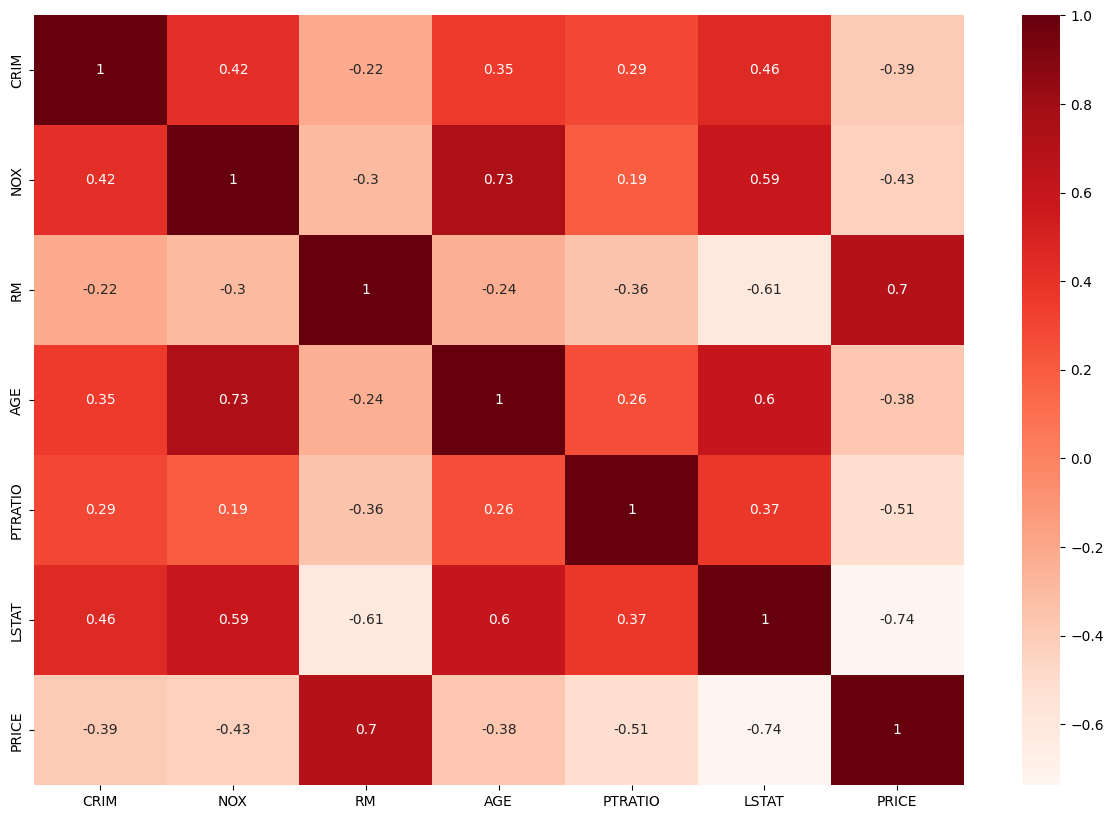

In [ ]:
# prompt: podrias crear un heatmap con la informacion de arriba?

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.show()


2) Seleccionen las columnas para la matriz de características (X) y seleccionen el PRECIO para el vector objetivo (y).



In [ ]:
y = df['PRICE']
X = df.drop(columns =['PRICE'])
print(X)

        CRIM    NOX     RM   AGE  PTRATIO  LSTAT
0    0.00632  0.538  6.575  65.2     15.3   4.98
1    0.02731  0.469  6.421  78.9     17.8   9.14
2    0.02729  0.469  7.185  61.1     17.8   4.03
3    0.03237  0.458  6.998  45.8     18.7   2.94
4    0.06905  0.458  7.147  54.2     18.7   5.33
..       ...    ...    ...   ...      ...    ...
501  0.06263  0.573  6.593  69.1     21.0   9.67
502  0.04527  0.573  6.120  76.7     21.0   9.08
503  0.06076  0.573  6.976  91.0     21.0   5.64
504  0.10959  0.573  6.794  89.3     21.0   6.48
505  0.04741  0.573  6.030  80.8     21.0   7.88

[506 rows x 6 columns]


3) Dividan los datos en grupos de entrenamiento y de prueba. ¡Usen el número 42 para la consistencia!



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(X_train, X_test, y_train, y_test)

         CRIM     NOX     RM   AGE  PTRATIO  LSTAT
182   0.09103  0.4880  7.155  92.2     17.8   4.82
155   3.53501  0.8710  6.152  82.6     14.7  15.02
280   0.03578  0.4429  7.820  64.5     14.9   3.76
126   0.38735  0.5810  5.613  95.6     19.1  27.26
329   0.06724  0.4600  6.333  17.2     16.9   7.34
..        ...     ...    ...   ...      ...    ...
106   0.17120  0.5200  5.836  91.9     20.9  18.66
270   0.29916  0.4640  5.856  42.1     18.6  13.00
348   0.01501  0.4350  6.635  29.7     17.0   5.99
435  11.16040  0.7400  6.629  94.6     20.2  23.27
102   0.22876  0.5200  6.405  85.4     20.9  10.63

[379 rows x 6 columns]          CRIM    NOX     RM    AGE  PTRATIO  LSTAT
173   0.09178  0.510  6.416   84.1     16.6   9.04
274   0.05644  0.447  6.758   32.9     17.6   3.53
491   0.10574  0.609  5.983   98.8     20.1  18.07
72    0.09164  0.413  6.065    7.8     19.2   5.52
452   5.09017  0.713  6.297   91.8     20.2  17.27
..        ...    ...    ...    ...      ...    ...
418  73

4) Instancien el modelo y ajústenlo al conjunto de entrenamiento.



In [ ]:
# prompt: puedes instanciar el modelo y adjuntarlo a X_train

modelo = LinearRegression()
modelo.fit(X_train, y_train)


5) Evaluar el modelo de rendimiento en el conjunto de entrenamiento y de prueba usando la puntuación R^2.  ¿Existe alguna diferencia entre el modelo de rendimiento en los datos de entrenamiento vs. los datos de prueba?


In [ ]:
print('R2 score on training set:', model.score(X_train, y_train))
print('R2 score on test set:', model.score(X_test, y_test))

R2 score on training set: 0.6954015699310794
R2 score on test set: 0.6356314088765056


6) Evalúen el modelo usando el error absoluto medio (EAM).




In [ ]:
print('MAE score on training set:', mean_absolute_error(y_train, modelo.predict(X_train)))
print('MAE score on test set:', mean_absolute_error(y_test, modelo.predict(X_test)))


MAE score on training set: 3.669619378415506
MAE score on test set: 3.33574273728613


7) Evalúen el modelo usando el error cuadrático medio (ECM).  

8) Evalúen el modelo de rendimiento usando RECM en el conjunto de entrenamiento y de prueba. Esta métrica es útil porque las unidades estarán en las mismas unidas del vector objetivo. En este caso mil dólares.  


In [ ]:
print('RMSE score on training set:', mean_squared_error(y_train, modelo.predict(X_train)))
print('RMSE score on test set:', mean_squared_error(y_test, modelo.predict(X_test)))


RMSE score on training set: 27.012316202586668
RMSE score on test set: 25.515691673715217


In [ ]:
# prompt: Podrias evaluar el modelo usando RECM

print('RECM score on training set:', np.sqrt(mean_squared_error(y_train, modelo.predict(X_train))))
print('RECM score on test set:', np.sqrt(mean_squared_error(y_test, modelo.predict(X_test))))


RECM score on training set: 5.197337414733305
RECM score on test set: 5.0513059374497615


# **Parte N°2**

### 1) Bagged trees

In [38]:
bagreg = BaggingRegressor(random_state = 42)
bagreg.get_params()
bagreg.fit(X_train, y_train)
bagreg.predict(X_test)
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9606756023782893
0.8204208271364619


### 2) Regresión de bosque aleatorio

In [42]:
rf = RandomForestRegressor(random_state = 42)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [43]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
rf.predict(X_test)

array([22.986, 31.391, 19.003, 23.141, 16.213, 20.666, 18.768, 15.219,
       21.251, 20.809, 20.253, 20.247,  8.237, 21.228, 19.717, 26.426,
       19.432,  8.497, 46.203, 15.325, 23.637, 23.557, 14.31 , 24.344,
       15.369, 13.575, 21.195, 13.96 , 18.668, 21.416, 19.64 , 23.35 ,
       28.457, 21.533, 14.143, 16.065, 34.532, 19.198, 20.46 , 23.926,
       18.542, 28.025, 45.118, 19.994, 22.885, 14.364, 15.116, 23.797,
       17.815, 28.089, 21.717, 34.018, 16.448, 25.876, 44.673, 21.957,
       16.028, 31.978, 21.921, 20.542, 26.234, 33.55 , 30.222, 19.88 ,
       27.288, 16.302, 14.934, 22.961, 27.268, 17.147, 20.538, 30.51 ,
       10.187, 21.264, 21.262,  7.225, 20.097, 46.97 , 12.082, 13.522,
       22.008, 12.609, 20.435,  8.976, 20.58 , 27.007, 16.026, 23.329,
       24.346, 17.787, 22.135,  7.881, 18.524, 20.042, 25.241, 19.298,
       32.793, 13.215, 12.961, 12.98 , 19.742, 24.277, 13.176, 20.387,
       21.179, 14.004, 19.233, 24.822, 20.402, 24.114,  9.165, 14.91 ,
      

In [45]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9771342521069045
0.8338530730048258


In [47]:
rf_9 = RandomForestRegressor(max_depth = 9, random_state = 42)
rf_9.fit(X_train, y_train)
rf_9_train_score = rf_9.score(X_train, y_train)
rf_9_test_score = rf_9.score(X_test, y_test)
print(rf_9_train_score)
print(rf_9_test_score)

0.9708593696865943
0.8288183588216603


In [48]:
[estimator.get_depth() for estimator in rf.estimators_]

[19,
 17,
 18,
 18,
 17,
 17,
 19,
 17,
 16,
 17,
 19,
 18,
 18,
 16,
 17,
 18,
 19,
 17,
 20,
 17,
 17,
 18,
 16,
 17,
 18,
 18,
 19,
 17,
 23,
 17,
 18,
 17,
 15,
 18,
 18,
 17,
 20,
 15,
 18,
 15,
 17,
 16,
 17,
 16,
 15,
 16,
 16,
 16,
 16,
 18,
 20,
 18,
 17,
 18,
 19,
 17,
 20,
 17,
 16,
 20,
 19,
 17,
 18,
 17,
 14,
 20,
 15,
 14,
 20,
 17,
 20,
 16,
 15,
 18,
 18,
 16,
 16,
 19,
 15,
 17,
 16,
 17,
 18,
 18,
 20,
 22,
 17,
 21,
 16,
 14,
 16,
 16,
 20,
 19,
 16,
 17,
 20,
 19,
 17,
 17]

In [49]:
rf_200 = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf_200.fit(X_train, y_train)
rf_200_train_score = rf_200.score(X_train, y_train)
rf_200_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.9761265842591911
0.8333231062640742
